In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/credit_card_purchases.csv')

In [ ]:
print(df.shape)

(1296675, 24)


In [ ]:

#Convert transaction date/time into separate columns
df[['trans_date', 'trans_time']] = df['trans_date_trans_time'].str.split(' ', expand=True)
new_df = df.drop('trans_date_trans_time', axis=1)
new_df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_time
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,2019-01-01,00:00:18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,2019-01-01,00:00:44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,2019-01-01,00:00:51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,2019-01-01,00:01:16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,2019-01-01,00:03:06


In [ ]:
new_df = new_df.drop('Unnamed: 0', axis=1)

In [ ]:
#Set transaction date to datetime format
new_df['trans_date'] = pd.to_datetime(new_df['trans_date'])
#Set date of birth column to datetime format
new_df['dob'] = pd.to_datetime(new_df['dob'])

#Create Year of Birth Column
new_df['year_of_birth'] = new_df['dob'].dt.year

#Create Current Year Columns
new_df['year_of_transaction'] = new_df['trans_date'].dt.year

#Calculate Age Column
new_df['age'] = new_df['year_of_transaction'] - new_df['year_of_birth']

In [ ]:
new_df = new_df.drop(['year_of_birth','year_of_transaction'], axis=1)


new_df['trans_time'] = pd.to_datetime(new_df['trans_time'], format='%H:%M:%S')

new_df['trans_hour']= new_df['trans_time'].dt.hour
new_df['trans_day_of_week']= new_df['trans_date'].dt.dayofweek
new_df['trans_month']= new_df['trans_date'].dt.month
new_df['trans_time'] = pd.to_datetime(new_df['trans_time'], format='%H:%M:%S').dt.time
new_df.tail()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_time,age,trans_hour,trans_day_of_week,trans_month
1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,...,36.841266,-111.690765,0,NaN,2020-06-21,12:12:08,59,12,6,6
1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,...,38.906881,-78.246528,0,22630.0,2020-06-21,12:12:19,41,12,6,6
1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,...,33.619513,-105.130529,0,88351.0,2020-06-21,12:12:32,53,12,6,6
1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,...,42.788940,-103.241160,0,69367.0,2020-06-21,12:13:36,40,12,6,6
1296674,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,...,46.565983,-114.186110,0,59870.0,2020-06-21,12:13:37,25,12,6,6


In [ ]:
new_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'merch_zipcode', 'trans_date', 'trans_time', 'age', 'trans_hour',
       'trans_day_of_week', 'trans_month'],
      dtype='object')

In [ ]:
#non_fraud_rows = df[df['is_fraud'] == 0].iloc[:10000]
non_fraud_rows = new_df[new_df['is_fraud'] == 0].sort_values(by='trans_date', ascending=False)
is_fraud = new_df[new_df['is_fraud'] == 1]

In [ ]:
non_fraud_rows=non_fraud_rows.head(10000)
non_fraud_rows.shape
non_fraud_rows.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_time,age,trans_hour,trans_day_of_week,trans_month
1296674,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,...,46.565983,-114.186110,0,59870.0,2020-06-21,12:13:37,25,12,6,6
1295771,6597888193422452,fraud_Rempel Inc,shopping_net,3.18,Bill,Lane,M,4725 Hurst Curve Apt. 634,Holliday,TX,...,34.249806,-98.698534,0,73546.0,2020-06-21,04:15:11,56,4,6,6
1295763,4745996322265,"fraud_Schumm, Bauch and Ondricka",grocery_pos,43.79,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,IN,...,41.847717,-87.458534,0,60615.0,2020-06-21,04:13:14,22,4,6,6
1295764,3540862542587229,fraud_Metz-Boehm,shopping_pos,9.15,Nancy,Roach,F,376 Brown Courts,Yellowstone National Park,WY,...,44.235577,-111.434171,0,NaN,2020-06-21,04:13:30,79,4,6,6
1295765,4841313716651064,fraud_Bashirian Group,shopping_net,85.74,Omar,Gay,M,2161 Blankenship Freeway,West Hartford,VT,...,43.476928,-72.165515,0,3753.0,2020-06-21,04:13:53,31,4,6,6


In [ ]:
is_fraud.shape

(7506, 28)

In [ ]:
model_df = pd.concat([is_fraud, non_fraud_rows])

In [ ]:
model_df.shape

(17506, 28)

In [ ]:
model_df.tail()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_time,age,trans_hour,trans_day_of_week,trans_month
1284323,4040099974063068803,"fraud_Lockman, West and Runte",grocery_pos,89.78,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,ND,...,48.978482,-101.795993,0,58782.0,2020-06-16,11:07:09,37,11,1,6
1284322,4670613943676271,"fraud_Cremin, Hamill and Reichel",misc_pos,9.01,Bianca,Novak,F,0953 David Skyway,Cuthbert,GA,...,30.980260,-85.492607,0,32440.0,2020-06-16,11:06:57,73,11,1,6
1284321,4584931703207308232,fraud_Herzog Ltd,misc_pos,47.83,Amanda,Gomez,F,8152 Brittany Centers,Dallas,TX,...,32.385699,-96.694607,0,75152.0,2020-06-16,11:06:53,45,11,1,6
1284320,5559857416065248,fraud_Schmitt Ltd,misc_net,3.10,Jack,Hill,M,5916 Susan Bridge Apt. 939,Grenada,CA,...,40.968900,-122.442174,0,96051.0,2020-06-16,11:06:37,75,11,1,6
1284319,4586260469584,fraud_Corwin-Collins,gas_transport,48.40,Melody,Thompson,F,0362 Anderson Wall,Mound City,MO,...,39.945158,-95.948466,0,66408.0,2020-06-16,11:05:55,67,11,1,6


In [ ]:
model_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_time,age,trans_hour,trans_day_of_week,trans_month
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,...,36.430124,-81.179483,1,28644.0,2019-01-02,01:06:37,31,1,2,1
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,...,29.819364,-99.142791,1,78055.0,2019-01-02,01:47:29,59,1,2,1
2523,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,...,29.273085,-98.836360,1,78039.0,2019-01-02,03:05:23,59,3,2,1
2546,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,...,35.909292,-82.091010,1,28777.0,2019-01-02,03:38:03,31,3,2,1
2553,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,...,29.786426,-98.683410,1,78006.0,2019-01-02,03:55:47,59,3,2,1


In [ ]:
model_df = model_df.sample(frac=1).reset_index(drop=True)

In [ ]:
model_df.isna().sum()

,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0
state,0


In [ ]:
# Handle missing values
model_df['merch_zipcode'] = model_df['merch_zipcode'].fillna(-1)

In [ ]:
model_df.shape

(17506, 28)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import make_column_transformer,make_column_selector

In [ ]:
model_df1=model_df.copy()

In [ ]:
print(model_df1.describe())

             cc_num           amt           zip           lat          long  \
count  1.750600e+04  17506.000000  17506.000000  17506.000000  17506.000000   
mean   4.104851e+17    268.439962  48581.507083     38.572358    -90.215847   
min    6.041621e+10      1.000000   1257.000000     20.027100   -165.672300   
25%    1.800365e+14     20.082500  25213.000000     34.778900    -96.917700   
50%    3.523843e+15     79.125000  47838.000000     39.390000    -87.133200   
75%    4.651007e+15    330.230000  72011.000000     41.846700    -80.124800   
max    4.992346e+18  12176.550000  99783.000000     66.693300    -67.950300   
std    1.296491e+18    367.374697  27176.012138      5.153602     14.173720   

           city_pop                            dob     unix_time  \
count  1.750600e+04                          17506  1.750600e+04   
mean   9.224958e+04  1972-04-02 11:33:20.913972360  1.361669e+09   
min    2.300000e+01            1924-10-30 00:00:00  1.325466e+09   
25%    7.410000e

In [ ]:
print(model_df1.isnull().sum())

cc_num               0
merchant             0
category             0
amt                  0
first                0
last                 0
gender               0
street               0
city                 0
state                0
zip                  0
lat                  0
long                 0
city_pop             0
job                  0
dob                  0
trans_num            0
unix_time            0
merch_lat            0
merch_long           0
is_fraud             0
merch_zipcode        0
trans_date           0
trans_time           0
age                  0
trans_hour           0
trans_day_of_week    0
trans_month          0
dtype: int64


In [ ]:
# Drop unnecessary columns
model_df1 = model_df1.drop(columns=['trans_num', 'unix_time', 'dob', 'first', 'last'])


In [ ]:
model_df1.nunique()

,0
cc_num,983
merchant,693
category,14
amt,12682
gender,2
street,983
city,894
state,51
zip,970
lat,968


In [ ]:
# Separate features and target variable
features = ['category','gender','job','state','trans_hour','amt','age','city_pop','trans_day_of_week','trans_month']
target = 'is_fraud'

In [ ]:
X = model_df1[features]
y = model_df1[target]

In [ ]:
X.dtypes


,0
category,object
gender,object
job,object
state,object
trans_hour,int32
amt,float64
age,int32
city_pop,int64
trans_day_of_week,int32
trans_month,int32


In [ ]:
# List of categorical columns
categorical_features = ['category', 'gender','job','state']
X_transformed=pd.get_dummies(X,drop_first=True)

In [ ]:
X_transformed.shape

(17506, 563)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std=StandardScaler()
XX_transformed=std.fit_transform(X_transformed)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(XX_transformed, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to view features and their importance
# Use the columns from the original DataFrame 'X_transformed'
importances_df = pd.DataFrame({'Feature': X_transformed.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Set display options to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.6f' % x)

print(importances_df)

                                     Feature  Importance
1                                        amt    0.331036
5                                trans_month    0.297576
0                                 trans_hour    0.113543
4                          trans_day_of_week    0.065283
2                                        age    0.019271
..                                       ...         ...
275       job_Investment banker, operational    0.000000
176  job_Engineer, broadcasting (operations)    0.000000
433        job_Scientist, research (medical)    0.000000
386                    job_Psychiatric nurse    0.000000
76                         job_Buyer, retail    0.000000

[563 rows x 2 columns]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss,roc_auc_score,roc_curve
import numpy as np
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model
Best Accuracy: 0.8956


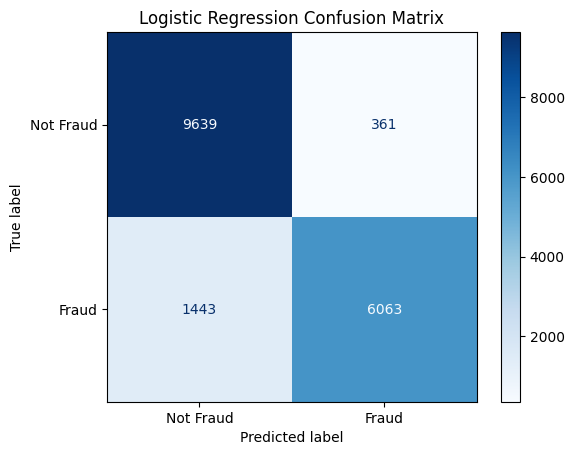

----------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
K-Nearest Neighbors Model
Best Accuracy: 0.9576


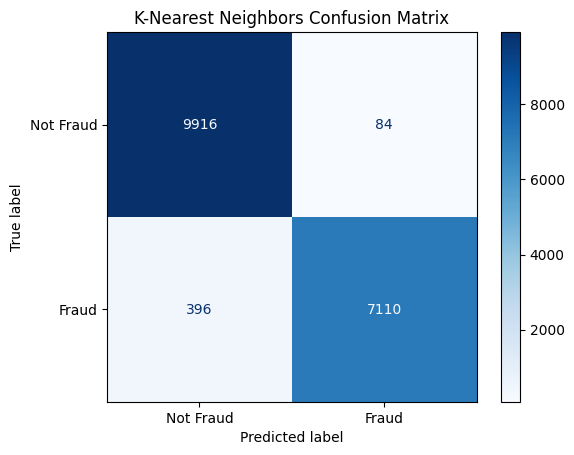

----------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Decision Tree Model
Best Accuracy: 0.9898


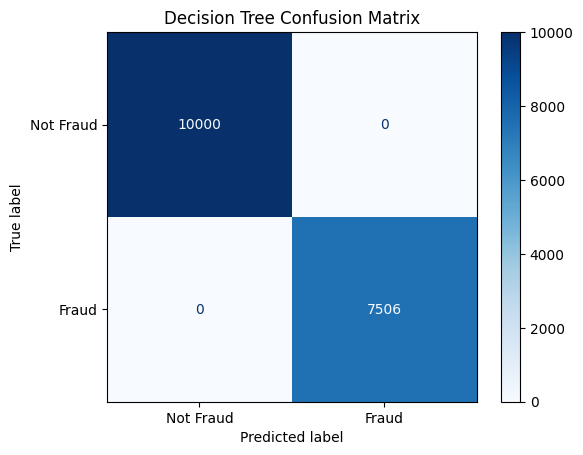

----------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Support Vector Classifier Model
Best Accuracy: 0.9780


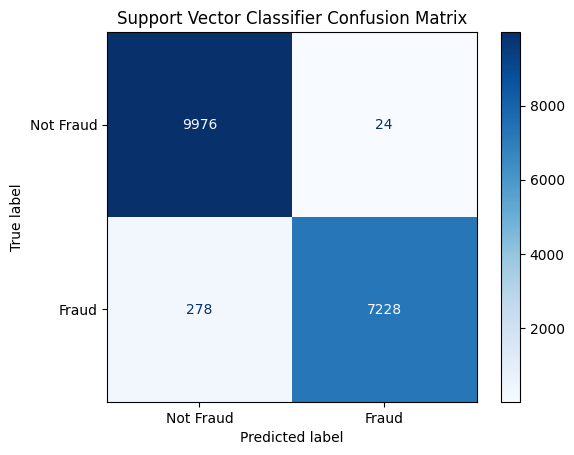

----------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Naive Bayes Model
Best Accuracy: 0.9569


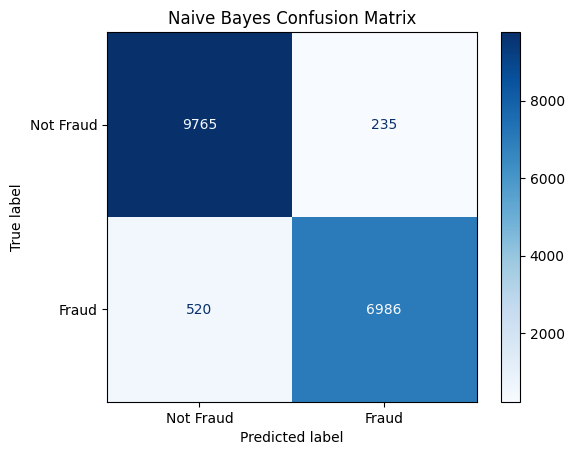

----------------------------------------
Best Model: Decision Tree with Accuracy: 0.9898


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt




# Define features and target
features = ['category', 'gender', 'state', 'trans_hour', 'amt', 'age', 'city_pop', 'trans_day_of_week', 'trans_month']
target = 'is_fraud'
X = model_df[features]
y = model_df[target]

# List of categorical columns
categorical_features = ['category', 'gender', 'trans_day_of_week', 'state']
numeric_features = [col for col in features if col not in categorical_features]

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'Naive Bayes': GaussianNB()
}

# Define a function to evaluate models using GridSearchCV without parameter tuning
def evaluate_model(name, model, X, y):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Set up GridSearchCV with only default parameters (no tuning)
    grid_search = GridSearchCV(pipeline, param_grid={}, cv=kfold, verbose=1, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X, y)

    print(f"{name} Model")
    print(f"Best Accuracy: {grid_search.best_score_:.4f}")

    # Get best estimator from GridSearchCV
    best_model = grid_search.best_estimator_

    # Fit the best model on the entire dataset to get confusion matrix
    y_pred = best_model.predict(X)
    cm = confusion_matrix(y, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    print("-" * 40)

    return grid_search.best_score_

# Evaluate each model
results = {}
for name, model in classifiers.items():
    accuracy = evaluate_model(name, model, X, y)
    results[name] = accuracy

# Select the best model
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]
print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")



Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Model
Best Parameters: {'classifier__C': 1.12, 'classifier__penalty': 'l2', 'classifier__solver': 'sag'}
Best Accuracy: 0.8959


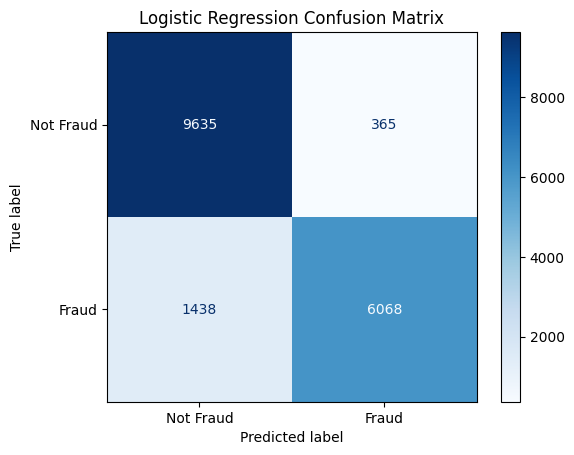

----------------------------------------
Fitting 5 folds for each of 44 candidates, totalling 220 fits
K-Nearest Neighbors Model
Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 6, 'classifier__weights': 'distance'}
Best Accuracy: 0.9692


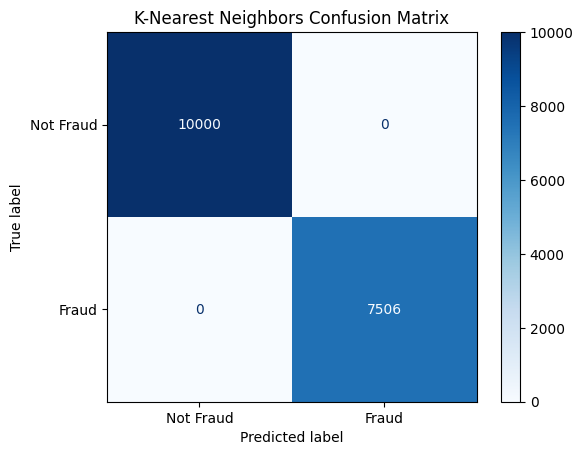

----------------------------------------
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Decision Tree Model
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Best Accuracy: 0.9914


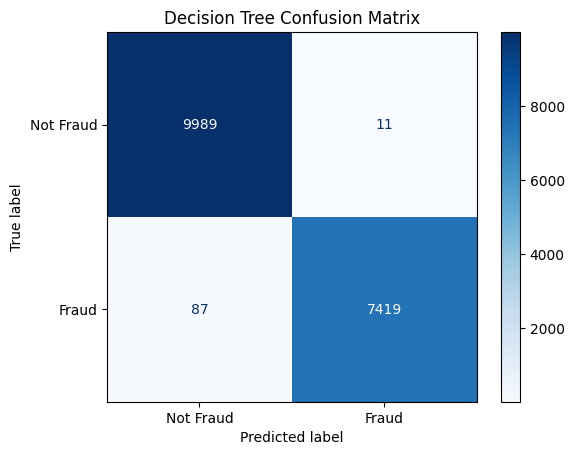

----------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3

Support Vector Classifier Model
Best Parameters: {'classifier__C': 1.0, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best Accuracy: 0.9780


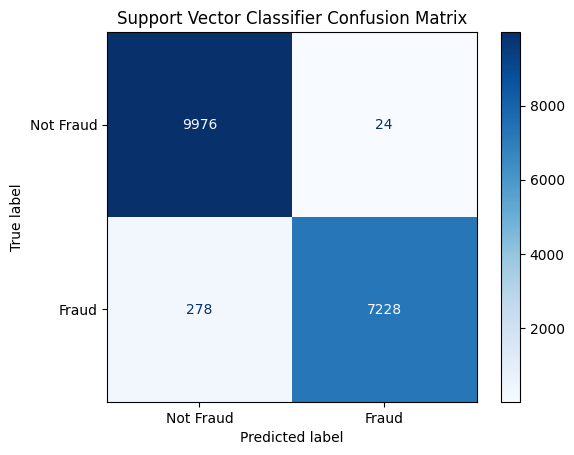

----------------------------------------
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Naive Bayes Model
Best Parameters: {'classifier__var_smoothing': 1e-08}
Best Accuracy: 0.9584


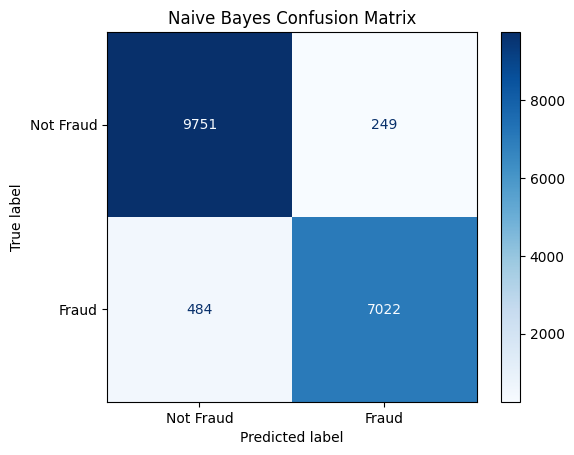

----------------------------------------
Best Model: Decision Tree with Accuracy: 0.9914


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming model_df is already defined and processed

# Define features and target
features = ['category', 'gender', 'state', 'trans_hour', 'amt', 'age', 'city_pop', 'trans_day_of_week', 'trans_month']
target = 'is_fraud'
X = model_df[features]
y = model_df[target]

# List of categorical columns
categorical_features = ['category', 'gender', 'trans_day_of_week', 'state']
numeric_features = [col for col in features if col not in categorical_features]

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Define classifiers and their hyperparameters
param_grids = {
    'Logistic Regression': {
        'classifier__C': np.linspace(0.01, 10, 10),
        'classifier__penalty': ['l2',None],
        'classifier__solver': ['lbfgs','newton-cg',
                    'newton-cholesky','sag']
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': np.arange(1,12),
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 3,5,10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Classifier': {
        'classifier__C': np.linspace(0, 1, 4),
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    'Naive Bayes': {
        'classifier__var_smoothing': np.logspace(-9, -4, 6)
    }
}

# Mapping of model names to their corresponding classes
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'Naive Bayes': GaussianNB()
}

# Define a function to evaluate models using GridSearchCV
def evaluate_model(name, model, param_grid, X, y):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Set up GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=kfold, verbose=1, n_jobs=-1, scoring='accuracy')

    try:
        grid_search.fit(X, y)
        print(f"{name} Model")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best Accuracy: {grid_search.best_score_:.4f}")

        # Get best estimator from GridSearchCV
        best_model = grid_search.best_estimator_

        # Fit the best model on the entire dataset to get confusion matrix
        y_pred = best_model.predict(X)
        cm = confusion_matrix(y, y_pred)

        # Display confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f"{name} Confusion Matrix")
        plt.show()
        print("-" * 40)

        return grid_search.best_score_

    except Exception as e:
        print(f"Error evaluating {name} Model: {e}")
        return np.nan

# Evaluate each model
results = {}
for name, model in models.items():
    param_grid = param_grids.get(name, {})
    accuracy = evaluate_model(name, model, param_grid, X, y)
    results[name] = accuracy

# Select the best model
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]
print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


In [ ]:
#==========SAVING MODEL===============
import joblib

# Assume `model` is your trained model
joblib.dump(best_model_name, 'model_joblib.pkl')


['model_joblib.pkl']

In [ ]:
#=============LOADING MODEL============
import joblib

# Load the model from the file
model = joblib.load('model_joblib.pkl')